In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import wordcloud as WordColud 


In [2]:
df=pd.read_csv("tweet.csv")
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [3]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
class_count = df['class'].value_counts()
class_count

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

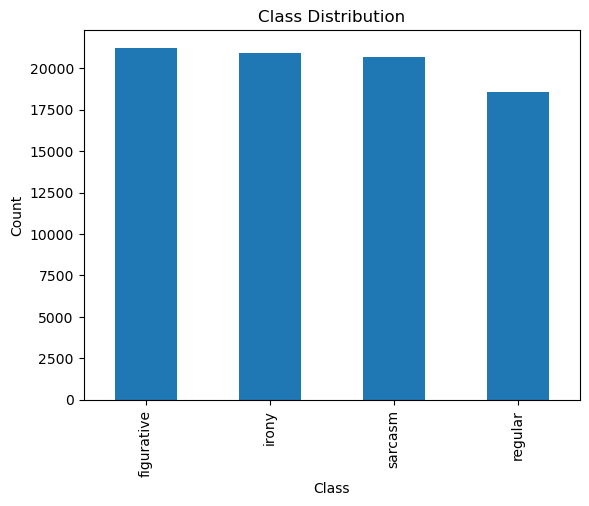

In [6]:
class_count.plot( kind ='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
df['tweets']=df['tweets'].str.lower()
df

,tweets,class
0,be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@iminworkjeremy @medsingle #dailymail readers ...,figurative
3,@wilw why do i get the feeling you like games?...,figurative
4,-@teacherarthurg @rweingarten you probably jus...,figurative
...,...,...
81403,photo: image via we heart it http://t.co/ky8nf...,sarcasm
81404,i never knew..i better put this out to the uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,i'm sure coverage like the fox news special “t...,sarcasm


In [9]:
stopwordsl=stopwords.words('english')

def cleaning_stopwords(tweets):
    return " ".join([word for word in str(tweets).split() if word not in stopwordsl])
df['tweets'] = df['tweets'].apply(lambda tweets: cleaning_stopwords(tweets))
df['tweets'].head()

0    aware dirty step get money #staylight #staywhi...
1    #sarcasm #people understand #diy #artattack ht...
2    @iminworkjeremy @medsingle #dailymail readers ...
3               @wilw get feeling like games? #sarcasm
4    -@teacherarthurg @rweingarten probably missed ...
Name: tweets, dtype: object

In [10]:
import re

In [11]:
df['tweets'] = df['tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24076\4253475646.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets'] = df['tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


In [12]:
## Removing Usermname
def remove_usernames_links(tweets):
    tweets = re.sub('@[^\s]+','',tweets)
    tweets = re.sub('http[^\s]+','',tweets)
    return tweets
df['tweets'] = df['tweets'].apply(remove_usernames_links)

In [13]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweets):
    translator = str.maketrans('', '', punctuations_list)
    return tweets.translate(translator)
df['tweets']= df['tweets'].apply(lambda tweets: cleaning_punctuations(tweets))
df['tweets'].tail()

81403    photo image via heart   childhood cool funny s...
81404    never knewi better put universe lolmaybe there...
81405    hey wanted say thanks  puberty letting apart i...
81406    im sure coverage like fox news special “the hi...
81407                         u13 believe see it p sarcasm
Name: tweets, dtype: object

In [14]:
def cleaning_numbers(tweets):
    return re.sub('[0-9]+', '', tweets)
df['tweets'] = df['tweets'].apply(lambda tweets: cleaning_numbers(tweets))
df['tweets'].tail()

81403    photo image via heart   childhood cool funny s...
81404    never knewi better put universe lolmaybe there...
81405    hey wanted say thanks  puberty letting apart i...
81406    im sure coverage like fox news special “the hi...
81407                           u believe see it p sarcasm
Name: tweets, dtype: object

In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# Tokenization and limitization function
def tokenize_and_limitize(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return the limited tokens as a string
    return ' '.join(tokens)

# Apply the function to the 'tweets' column
df['tweets'] = df['tweets'].apply(tokenize_and_limitize)

# Print the updated DataFrame
print(df)

                                                  tweets       class
0      aware dirty step get money staylight staywhite...  figurative
1                sarcasm people understand diy artattack  figurative
2      dailymail reader sensible always shocker sarca...  figurative
3                          get feeling like game sarcasm  figurative
4                         probably missed text sarcastic  figurative
...                                                  ...         ...
81403  photo image via heart childhood cool funny sar...     sarcasm
81404  never knewi better put universe lolmaybe there...     sarcasm
81405  hey wanted say thanks puberty letting apart it...     sarcasm
81406  im sure coverage like fox news special “ hidde...     sarcasm
81407                            u believe see p sarcasm     sarcasm

[81408 rows x 2 columns]


In [17]:
# Assuming your DataFrame is named 'df'
df.to_csv('cleaned.csv', index=False)


In [18]:
from openpyxl import load_workbook
# Create a copy of the dfFrame with the 'tweets' column split into individual words
df_words = df['tweets'].str.split(expand=True).stack().reset_index(level=1, drop=True).rename('Word')

# Merge the original dfFrame with the split words dfFrame
df_merge = pd.merge(df, df_words, left_index=True, right_index=True)

# Pivot the merged dfFrame to get the count of each word in each class
pivot_df = df_merge.pivot_table(index='Word', columns='class', aggfunc='size', fill_value=0)

# Reset the index and rename the columns for the final result dfFrame
result_df = pivot_df.reset_index().rename_axis(None, axis=1)

# Add the 'Total Count' column by summing the counts across all classes
result_df['Total Count'] = result_df[['figurative', 'irony', 'regular', 'sarcasm']].sum(axis=1)

# Add a column to indicate words present in all four classes
result_df['Present in All classes'] = (result_df['figurative'] > 0) & (result_df['irony'] > 0) & (result_df['regular'] > 0) & (result_df['sarcasm'] > 0)



In [19]:
# Save the result DataFrame to an Excel file
result_df.to_excel('result1.xlsx', index=False)

# Add a filter to the 'Present in All Classes' column
book = load_workbook('result1.xlsx')
writer = pd.ExcelWriter('result1.xlsx', engine='openpyxl')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
writer.sheets['Sheet1'].auto_filter.ref = writer.sheets['Sheet1'].dimensions

# Save the changes to the Excel file
writer.save()

### Top 300 words that are not in all of the classes

In [20]:
top_words_not = result_df[result_df['Present in All classes'] == False].nlargest(300, 'Total Count')['Word'].tolist()
top_words_not

['sarcasm',
 'longreads',
 'funnytweets',
 'cnndebate',
 'pict',
 'reuters',
 'earring',
 'offbeat',
 'tinder',
 'alanis',
 'template',
 'intelmm',
 'osint',
 'romance',
 'fu…',
 'fiorina',
 'medicine',
 'imwithhuck',
 'edchat',
 'gee',
 'raining',
 'boehner',
 'hoting',
 'soooo',
 'longrea…',
 'tilnow',
 'breakingnews',
 'cecilthelion',
 'longr…',
 'ironically',
 'shocker',
 'mystery',
 'ebook',
 'iartg',
 'morissette',
 'pharma',
 'prescription',
 'yummy',
 'colbert',
 'gifs',
 'cameron',
 'kindle',
 'laborday',
 'libspill',
 'complains',
 'eshumorcom',
 'bachelorinparadise',
 'claiming',
 'peaceday',
 'cbb',
 'europa',
 'pitching',
 'pornban',
 'slave',
 'appreciated',
 'bullpen',
 'vascable',
 'hnn',
 'newsdict',
 'sunny',
 'vw',
 'advert',
 'amsterdam',
 'facepalm',
 'managed',
 'spiritual',
 'stumbleupon',
 'affect',
 'emission',
 'thrilled',
 'appleevent',
 'feedly',
 'rand',
 'washingtonpost',
 'allah',
 'commenting',
 'popefrancis',
 'redsox',
 'druggist',
 'genocide',
 'mouri

In [21]:
top_words_are = result_df[result_df['Present in All classes'] == True].nlargest(300, 'Total Count')['Word'].tolist()
top_words_are

['irony',
 'ironic',
 'news',
 'im',
 'love',
 'like',
 'people',
 'get',
 'amp',
 'peace',
 'day',
 'late',
 'drug',
 'humor',
 'education',
 'one',
 'politics',
 'u',
 'funny',
 'time',
 'good',
 'know',
 'lol',
 'say',
 'make',
 'sarcastic',
 'great',
 'life',
 'cant',
 'today',
 'gopdebate',
 'right',
 'see',
 'work',
 'really',
 'new',
 'go',
 'would',
 'oh',
 'want',
 'need',
 'thing',
 'think',
 'got',
 'well',
 '’',
 'way',
 'never',
 'guy',
 'year',
 'back',
 'thats',
 'going',
 'much',
 'look',
 'night',
 'via',
 'thanks',
 'man',
 'take',
 'woman',
 'world',
 'first',
 'better',
 'game',
 'best',
 'someone',
 'last',
 'fun',
 'trump',
 'sure',
 'tweet',
 'job',
 'even',
 'still',
 'school',
 'getting',
 'come',
 'let',
 'always',
 'show',
 'could',
 'twitter',
 'yes',
 'find',
 'yet',
 'week',
 'another',
 'yeah',
 'mean',
 'wait',
 'call',
 'ever',
 'feel',
 'start',
 'gop',
 'wow',
 'nothing',
 'he',
 'said',
 'use',
 'many',
 'kid',
 'quote',
 'thought',
 'made',
 'bad',


In [22]:
def remove_words(text):
    text = ' '.join([word for word in text.split() if word not in top_words_are])
    return text

# Apply the function to the 'Tweets' column
df['tweets'] = df['tweets'].apply(remove_words)

In [23]:
df

,tweets,class
0,aware dirty step staylight staywhite moralneeded,figurative
1,sarcasm understand diy artattack,figurative
2,dailymail reader sensible shocker dailyfail in...,figurative
3,feeling sarcasm,figurative
4,probably missed text,figurative
...,...,...
81403,image heart childhood cool sarcasm,sarcasm
81404,knewi universe lolmaybe date upon horizon sarcasm,sarcasm
81405,wanted puberty letting apart itty bitty fuckin...,sarcasm
81406,coverage fox special hidden harvest influence ...,sarcasm


## TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
X = df['tweets']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
vectorizer = TfidfVectorizer()


In [27]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [28]:
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
classifier = SVC()
classifier.fit(X_train_tfidf, y_train)


SVC()

In [30]:
y_pred = classifier.predict(X_test_tfidf)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5455103795602506


## COUNT vECTORIZER 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have the preprocessed tweet data and corresponding class labels stored in lists or arrays

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_counts = vectorizer.transform(X_test)

In [33]:

# Create an instance of the classifier (e.g., SVM)
classifier = SVC()

# Train the classifier on the count-based features and class labels
classifier.fit(X_train_counts, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test_counts)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the true class labels stored in y_test

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.5668836752241739
Classification Report:
              precision    recall  f1-score   support

  figurative       0.03      0.01      0.01      4179
       irony       0.48      0.77      0.59      4276
     regular       0.81      0.64      0.72      3696
     sarcasm       0.64      0.86      0.73      4131

    accuracy                           0.57     16282
   macro avg       0.49      0.57      0.51     16282
weighted avg       0.48      0.57      0.51     16282



### word embedings

In [35]:
class_mapping={'figurative':0, 'irony':1, 'regular':2, 'sarcasm':3}
df['class']=df['class'].map(class_mapping)

In [36]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [37]:
df

,tweets,class
0,aware dirty step staylight staywhite moralneeded,0
1,sarcasm understand diy artattack,0
2,dailymail reader sensible shocker dailyfail in...,0
3,feeling sarcasm,0
4,probably missed text,0
...,...,...
81403,image heart childhood cool sarcasm,3
81404,knewi universe lolmaybe date upon horizon sarcasm,3
81405,wanted puberty letting apart itty bitty fuckin...,3
81406,coverage fox special hidden harvest influence ...,3


In [38]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Tokenized tweets
tokenized_tweets = [tweet.split() for tweet in df['tweets']]

# Train Word2Vec model
model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Convert tweets to average word embeddings
tweet_embeddings = []
for tweet in tokenized_tweets:
    embeddings = [model.wv[word] for word in tweet if word in model.wv]
    if embeddings:
        tweet_embedding = np.mean(embeddings, axis=0)
    else:
        tweet_embedding = np.zeros(100)  # Use zero vector if no word embeddings found
    tweet_embeddings.append(tweet_embedding)

# Prepare data for training
X = np.vstack(tweet_embeddings)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.4813290750522049


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## N = 2

In [39]:
df

,tweets,class
0,aware dirty step staylight staywhite moralneeded,0
1,sarcasm understand diy artattack,0
2,dailymail reader sensible shocker dailyfail in...,0
3,feeling sarcasm,0
4,probably missed text,0
...,...,...
81403,image heart childhood cool sarcasm,3
81404,knewi universe lolmaybe date upon horizon sarcasm,3
81405,wanted puberty letting apart itty bitty fuckin...,3
81406,coverage fox special hidden harvest influence ...,3


In [40]:
class_mapping={0:'figurative', 1:'irony', 2:'regular', 3:'sarcasm'}
df['class']=df['class'].map(class_mapping)

In [41]:
df = pd.read_csv("cleaned.csv")

In [42]:
import pandas as pd
import nltk
from nltk import bigrams
from collections import Counter

# Load your dataset
data = pd.read_csv('cleaned.csv')

# Select a particular class
target_class = 'figurative'

# Filter the dataset for the target class
target_data = data[data['class'] == target_class]

# Tokenize the tweets
tokenized_tweets = []
for tweet in target_data['tweets']:
    if isinstance(tweet, str):
        tokenized_tweets.append(tweet.split())

# Generate bigrams
tweet_bigrams = [list(bigrams(tweet_tokens)) for tweet_tokens in tokenized_tweets]

# Flatten the list of bigrams
all_bigrams = [bigram for tweet_bigram in tweet_bigrams for bigram in tweet_bigram]

# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Convert the counts to a DataFrame
bigram_df = pd.DataFrame.from_dict(bigram_counts, orient='index', columns=['Count'])

# Sort the DataFrame by the count column in descending order
bigram_df = bigram_df.sort_values('Count', ascending=False)

# Calculate the total count of bigrams in the target class
total_count = bigram_df['Count'].sum()

# Add a column with the total count for all classes
bigram_df['Total Count'] = total_count

print(bigram_df)


                   Count  Total Count
(funny, sarcasm)     192       166797
(right, sarcasm)     118       166797
(gon, na)            107       166797
(day, sarcasm)       104       166797
(look, like)          98       166797
...                  ...          ...
(visited, mosque)      1       166797
(never, visited)       1       166797
(image, though)        1       166797
(typo, image)          1       166797
(rwc, 🏉)               1       166797

[136432 rows x 2 columns]


In [43]:
pd.DataFrame(bigram_df)

,Count,Total Count
"(funny, sarcasm)",192,166797
"(right, sarcasm)",118,166797
"(gon, na)",107,166797
"(day, sarcasm)",104,166797
"(look, like)",98,166797
...,...,...
"(visited, mosque)",1,166797
"(never, visited)",1,166797
"(image, though)",1,166797
"(typo, image)",1,166797


In [44]:
# Save the DataFrame as an Excel file
bigram_df.to_excel('result2.xlsx', index_label='Bigram')


In [45]:
re2=pd.read_excel('result2.xlsx')
re2


,Bigram,Count,Total Count
0,"('funny', 'sarcasm')",192,166797
1,"('right', 'sarcasm')",118,166797
2,"('gon', 'na')",107,166797
3,"('day', 'sarcasm')",104,166797
4,"('look', 'like')",98,166797
...,...,...,...
136427,"('visited', 'mosque')",1,166797
136428,"('never', 'visited')",1,166797
136429,"('image', 'though')",1,166797
136430,"('typo', 'image')",1,166797


In [46]:
top_bi = re2.nlargest(1000, 'Count')['Bigram'].tolist()
top_bi

["('funny', 'sarcasm')",
 "('right', 'sarcasm')",
 "('gon', 'na')",
 "('day', 'sarcasm')",
 "('look', 'like')",
 "('cant', 'wait')",
 "('im', 'sure')",
 "('fun', 'sarcasm')",
 "('social', 'medium')",
 "('last', 'night')",
 "('oh', 'irony')",
 "('great', 'sarcasm')",
 "('got', 'ta')",
 "('lol', 'sarcasm')",
 "('lol', 'irony')",
 "('time', 'sarcasm')",
 "('game', 'sarcasm')",
 "('work', 'sarcasm')",
 "('im', 'glad')",
 "('good', 'job')",
 "('sound', 'like')",
 "('better', 'sarcasm')",
 "('good', 'thing')",
 "('today', 'sarcasm')",
 "('job', 'sarcasm')",
 "('day', 'irony')",
 "('awesome', 'sarcasm')",
 "('yay', 'sarcasm')",
 "('love', 'sarcasm')",
 "('wan', 'na')",
 "('know', 'sarcasm')",
 "('lol', 'ironic')",
 "('year', 'sarcasm')",
 "('good', 'sarcasm')",
 "('well', 'done')",
 "('well', 'sarcasm')",
 "('feel', 'like')",
 "('irony', 'life')",
 "('year', 'ago')",
 "('today', 'irony')",
 "('love', 'people')",
 "('😂', 'irony')",
 "('life', 'sarcasm')",
 "('seems', 'like')",
 "('much', 'fun'

In [47]:
def remove_words(text):
    if isinstance(text, float):
        return ''
    text = ' '.join([word for word in text.split() if word not in top_bi])
    return text

# Apply the function to the 'tweets' column
df['tweets'] = df['tweets'].apply(remove_words)


# N = 3 

In [48]:
import pandas as pd
import nltk
from nltk import trigrams
from collections import Counter

# Load your dataset
data = pd.read_csv('cleaned.csv')

# Select a particular class
target_class = 'figurative'

# Filter the dataset for the target class
target_data = data[data['class'] == target_class]

# Tokenize the tweets
tokenized_tweets = []
for tweet in target_data['tweets']:
    if isinstance(tweet, str):
        tokenized_tweets.append(tweet.split())

# Generate trigrams
tweet_trigrams = [list(trigrams(tweet_tokens)) for tweet_tokens in tokenized_tweets]

# Flatten the list of trigrams
all_trigrams = [trigram for tweet_trigram in tweet_trigrams for trigram in tweet_trigram]

# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

# Convert the counts to a DataFrame
trigram_df = pd.DataFrame.from_dict(trigram_counts, orient='index', columns=['Count'])

# Sort the DataFrame by the count column in descending order
trigram_df = trigram_df.sort_values('Count', ascending=False)

# Calculate the total count of trigrams in the target class
total_count = trigram_df['Count'].sum()

# Add a column with the total count for all classes
trigram_df['Total Count'] = total_count

print(trigram_df)


                                             Count  Total Count
(got, ta, love)                                 29       145582
(im, gon, na)                                   20       145582
(much, fun, sarcasm)                            20       145582
(cant, wait, see)                               16       145582
(good, job, sarcasm)                            16       145582
...                                            ...          ...
(lifeimitatesart, irony, albertafreestore…)      1       145582
(store, lifeimitatesart, irony)                  1       145582
(free, store, lifeimitatesart)                   1       145582
(slipper, free, store)                           1       145582
(sarcasm, rwc, 🏉)                                1       145582

[142805 rows x 2 columns]


In [49]:
pd.DataFrame(trigram_df)

,Count,Total Count
"(got, ta, love)",29,145582
"(im, gon, na)",20,145582
"(much, fun, sarcasm)",20,145582
"(cant, wait, see)",16,145582
"(good, job, sarcasm)",16,145582
...,...,...
"(lifeimitatesart, irony, albertafreestore…)",1,145582
"(store, lifeimitatesart, irony)",1,145582
"(free, store, lifeimitatesart)",1,145582
"(slipper, free, store)",1,145582


In [50]:
# Save the DataFrame as an Excel file
trigram_df.to_excel('result3.xlsx', index_label='trigram')


In [51]:
re3=pd.read_excel('result3.xlsx')
re3


,trigram,Count,Total Count
0,"('got', 'ta', 'love')",29,145582
1,"('im', 'gon', 'na')",20,145582
2,"('much', 'fun', 'sarcasm')",20,145582
3,"('cant', 'wait', 'see')",16,145582
4,"('good', 'job', 'sarcasm')",16,145582
...,...,...,...
142800,"('lifeimitatesart', 'irony', 'albertafreestore…')",1,145582
142801,"('store', 'lifeimitatesart', 'irony')",1,145582
142802,"('free', 'store', 'lifeimitatesart')",1,145582
142803,"('slipper', 'free', 'store')",1,145582


In [52]:
top_tri = re3.nlargest(20, 'Count')['trigram'].tolist()
top_tri

["('got', 'ta', 'love')",
 "('im', 'gon', 'na')",
 "('much', 'fun', 'sarcasm')",
 "('cant', 'wait', 'see')",
 "('good', 'job', 'sarcasm')",
 "('social', 'medium', 'irony')",
 "('keep', 'getting', 'better')",
 "('lowest', 'form', 'wit')",
 "('ha', 'ha', 'ha')",
 "('great', 'day', 'sarcasm')",
 "('see', 'coming', 'sarcasm')",
 "('well', 'done', 'sarcasm')",
 "('irony', 'fun', 'landlord')",
 "('ultimate', 'irony', 'fun')",
 "('landlord', 'ultimate', 'irony')",
 "('fun', 'landlord', 'nosmoking')",
 "('nosmoking', 'smoking', 'irony')",
 "('landlord', 'nosmoking', 'smoking')",
 "('make', 'sense', 'sarcasm')",
 "('always', 'fun', 'sarcasm')"]

In [53]:
def remove_words(text):
    if isinstance(text, float):
        return ''
    text = ' '.join([word for word in text.split() if word not in top_tri])
    return text

# Apply the function to the 'tweets' column
df['tweets'] = df['tweets'].apply(remove_words)

In [54]:
df

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people understand diy artattack,figurative
2,dailymail reader sensible always shocker sarca...,figurative
3,get feeling like game sarcasm,figurative
4,probably missed text sarcastic,figurative
...,...,...
81403,photo image via heart childhood cool funny sar...,sarcasm
81404,never knewi better put universe lolmaybe there...,sarcasm
81405,hey wanted say thanks puberty letting apart it...,sarcasm
81406,im sure coverage like fox news special “ hidde...,sarcasm


In [66]:
# Tokenized tweets
tokenized_tweets = [tweet.split() for tweet in df['tweets']]

# Train Word2Vec model
model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Convert tweets to average word embeddings
tweet_embeddings = []
for tweet in tokenized_tweets:
    embeddings = [model.wv[word] for word in tweet if word in model.wv]
    if embeddings:
        tweet_embedding = np.mean(embeddings, axis=0)
    else:
        tweet_embedding = np.zeros(100)  # Use zero vector if no word embeddings found
    tweet_embeddings.append(tweet_embedding)

# Prepare data for training
X = np.vstack(tweet_embeddings)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7240510993735413
              precision    recall  f1-score   support

  figurative       0.34      0.07      0.12      4179
       irony       0.67      0.93      0.78      4276
     regular       0.99      1.00      1.00      3696
     sarcasm       0.66      0.93      0.77      4131

    accuracy                           0.72     16282
   macro avg       0.67      0.73      0.67     16282
weighted avg       0.66      0.72      0.66     16282



In [62]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the tweet data and labels

tweets = df['tweets']
labels = df['class']

# Preprocess the tweets (e.g., lowercasing, removing punctuation, etc.)
# ...

# Split the data into training and testing sets
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Initialize the vectorizer with bigram features
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Transform the training data into bigram feature vectors
train_features = vectorizer.fit_transform(train_tweets)

# Transform the testing data using the same vectorizer
test_features = vectorizer.transform(test_tweets)

# Build a classification model (e.g., logistic regression)
model = LogisticRegression()
model.fit(train_features, train_labels)

# Predict the labels for the test set
predictions = model.predict(test_features)

# Evaluate the model performance
print(classification_report(test_labels, predictions))



E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  figurative       0.11      0.09      0.10      4179
       irony       0.43      0.55      0.48      4276
     regular       0.93      0.74      0.82      3696
     sarcasm       0.54      0.55      0.54      4131

    accuracy                           0.47     16282
   macro avg       0.50      0.48      0.49     16282
weighted avg       0.49      0.47      0.48     16282



In [57]:
from pickle import dump

In [58]:
dump(lr_model, open('clsf.pkl','wb'))

In [59]:
dump(tokenized_tweets, open('tokenized.pkl','wb'))